<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_10_ProjTen_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [1]:
# utils
import os, sys, warnings
import numpy as np
import pandas as pd
from numpy.random import randn, randint, rand
from scipy import sparse
## sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import (IterativeImputer,
                            SimpleImputer)
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder,
                                   KernelCenterer,
                                   LabelEncoder,
                                   LabelBinarizer,
                                   scale,
                                   StandardScaler,
                                   RobustScaler,
                                   MaxAbsScaler,
                                   MinMaxScaler,
                                   PolynomialFeatures,
                                   Binarizer,
                                   KBinsDiscretizer,
                                   OrdinalEncoder,
                                   Normalizer,
                                   PowerTransformer,
                                   QuantileTransformer)
## vis
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
print("sklearn: ", sklearn.__version__)

sklearn:  1.5.2


In [3]:
print(sys.executable)
print(sys.version)

/usr/bin/python3
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [4]:
print(os.getcwd())

/content


## Setting

In [5]:
warnings.filterwarnings('ignore')

In [6]:
InteractiveShell.ast_node_interactivity = "all"

In [7]:
%matplotlib inline

# Data Processing

Text(0.5, 1.0, 'Original Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

Text(0.5, 1.0, 'Standardized Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

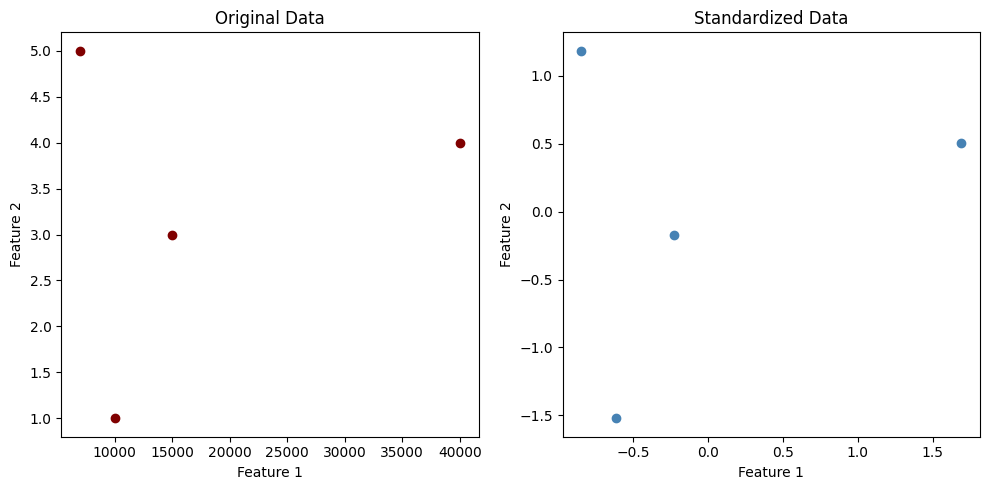

In [8]:
x = np.array([[10000, 7000, 15000, 40000], [1, 5, 3, 4]]).T
x_std = scale(x)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(x[:, 0], x[:, 1], color='maroon')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(x_std[:, 0], x_std[:, 1], color='steelblue')
axes[1].set_title('Standardized Data')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Data')

Text(0.5, 1.0, 'Standardized Data')

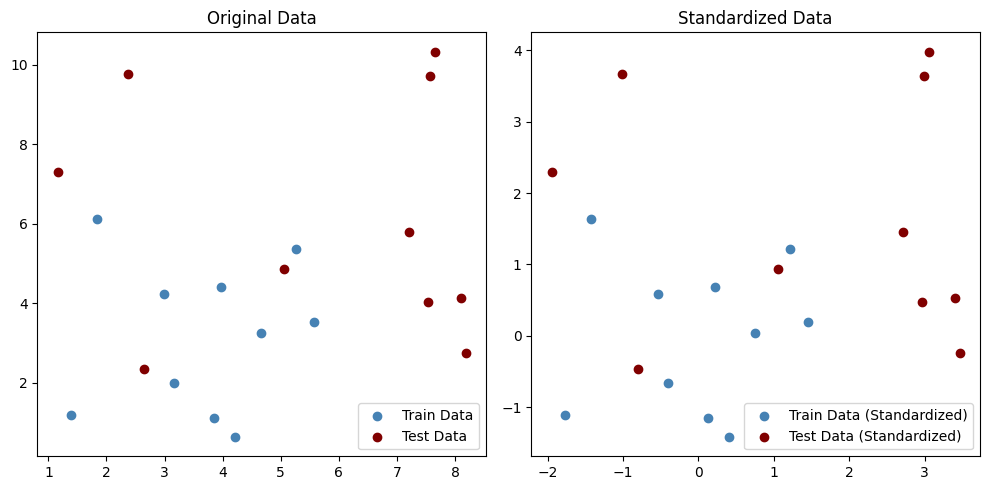

In [9]:
x_train = 5 * rand(10, 2) + 2 * rand(10, 2)
x_test = 8 * rand(10, 2) + 3 * rand(10, 2)

obj_scaler = StandardScaler().fit(x_train)
x_train_std = obj_scaler.transform(x_train)
x_test_std = obj_scaler.transform(x_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(x_train[:, 0], x_train[:, 1], color='steelblue', label='Train Data')
axes[0].scatter(x_test[:, 0], x_test[:, 1], color='maroon', label='Test Data')
axes[0].set_title('Original Data')
axes[0].legend()

axes[1].scatter(x_train_std[:, 0], x_train_std[:, 1], color='steelblue', label='Train Data (Standardized)')
axes[1].scatter(x_test_std[:, 0], x_test_std[:, 1], color='maroon', label='Test Data (Standardized)')
axes[1].set_title('Standardized Data')
axes[1].legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Data')

Text(0.5, 1.0, 'MinMax Scaled Data')

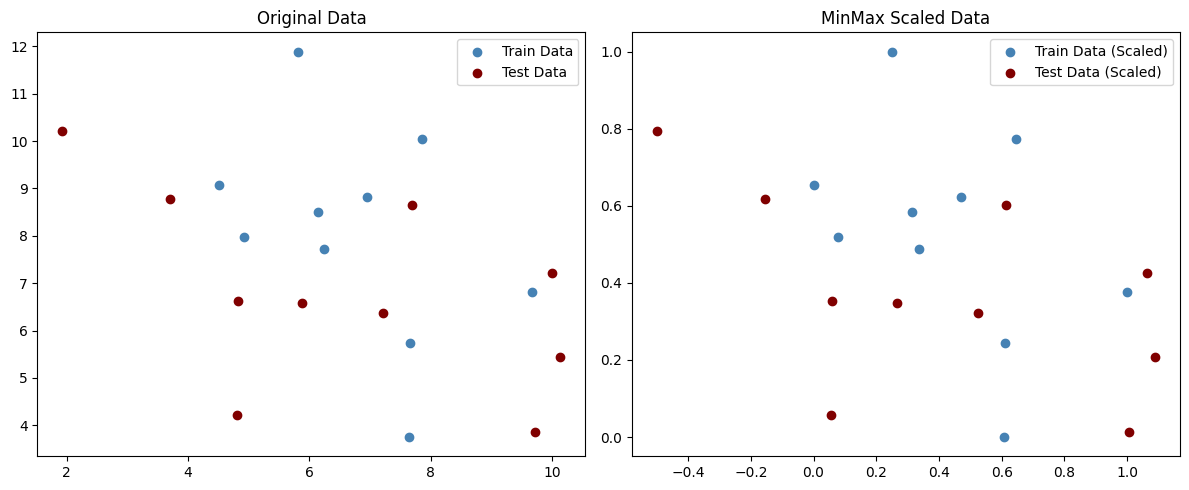

In [10]:
X_train = 5 * rand(10, 3) + 7 * rand(10, 3) + 2
X_test = 3 * rand(10, 3) + 8 * rand(10, 3) + 1

obj_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = obj_scaler.transform(X_train)
X_test_scaled = obj_scaler.transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], color='steelblue', label='Train Data')
axes[0].scatter(X_test[:, 0], X_test[:, 1], color='maroon', label='Test Data')
axes[0].set_title('Original Data')
axes[0].legend()

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='steelblue', label='Train Data (Scaled)')
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], color='maroon', label='Test Data (Scaled)')
axes[1].set_title('MinMax Scaled Data')
axes[1].legend()

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3fba2ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3fba3430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb3fba2c50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3fba3970>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3fba3c10>,
 'means': []}

Text(0.5, 1.0, 'Original X_train')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3fbe36d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3fbe3c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb3fbe3430>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3fc24190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3fc24430>,
 'means': []}

Text(0.5, 1.0, 'Scaled X_train')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3fa60130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3fa60670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb3fc27e50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3fa60bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3fa60e50>,
 'means': []}

Text(0.5, 1.0, 'Original X_test')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3fa9cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3fa9d090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb3fa9c8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3fa9d5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3fa9d870>,
 'means': []}

Text(0.5, 1.0, 'Scaled X_test')

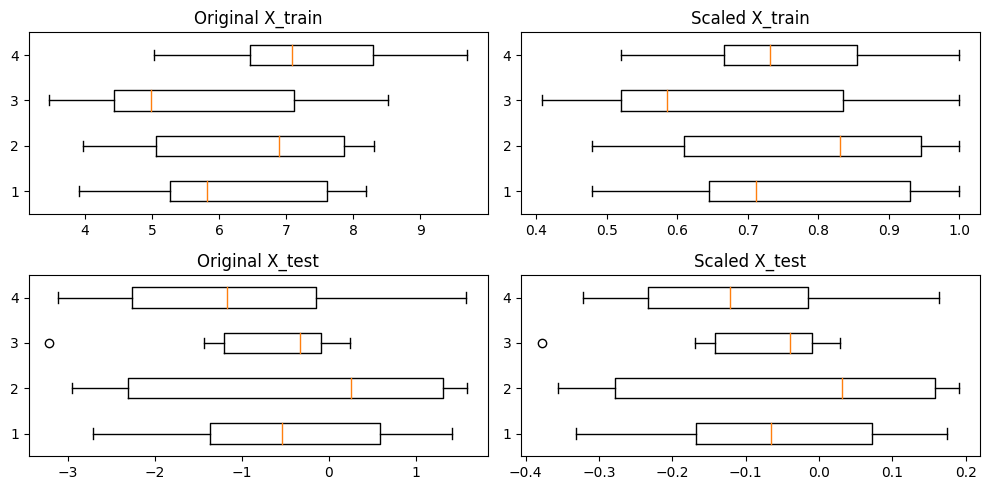

In [11]:
X_train = 3 * rand(10, 4) + 6 * rand(10, 4) + 2
X_test = 2 * rand(10, 4) + 5 * rand(10, 4) - 4

obj_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = obj_scaler.transform(X_train)
X_test_scaled = obj_scaler.transform(X_test)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].boxplot(X_train, vert=False)
axes[0, 0].set_title('Original X_train')

axes[0, 1].boxplot(X_train_scaled, vert=False)
axes[0, 1].set_title('Scaled X_train')

axes[1, 0].boxplot(X_test, vert=False)
axes[1, 0].set_title('Original X_test')

axes[1, 1].boxplot(X_test_scaled, vert=False)
axes[1, 1].set_title('Scaled X_test')

plt.tight_layout()
plt.show()

X_csr:
   (0, 0)	1
  (0, 2)	2
  (1, 2)	1
  (2, 0)	7

X_csc:
   (0, 0)	1
  (2, 0)	7
  (0, 2)	2
  (1, 2)	1

X_train_scaled (CSR format):
   (0, 0)	0.3234983196103152
  (0, 2)	2.449489742783178
  (1, 2)	1.224744871391589
  (2, 0)	2.2644882372722064

X_test_scaled (CSR format):
   (0, 0)	0.6668632277628959
  (0, 1)	-0.7920244729692825
  (0, 2)	1.2086802351428318
  (1, 0)	0.054852213424242
  (1, 1)	0.0005435613347879453
  (1, 2)	3.0269074880869735


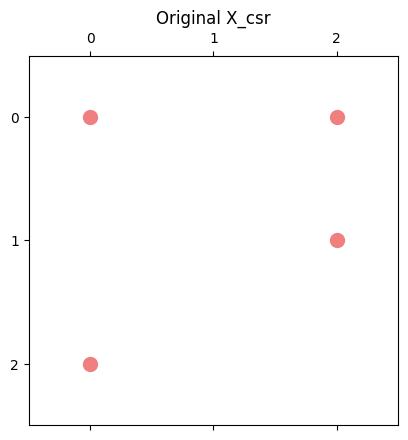

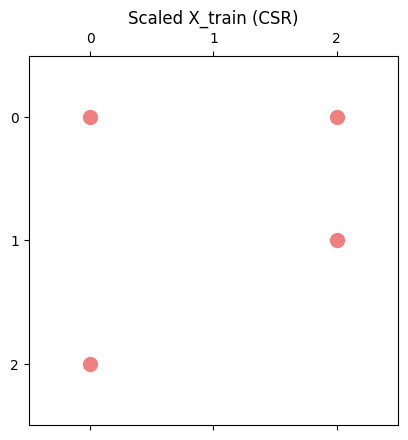

In [12]:
X = [[1, 0, 2], [0, 0, 1], [7, 0, 0]]
X_csr = sparse.csr_matrix(X)
X_csc = sparse.csc_matrix(X)

Z = 2 * rand(2, 3) + 5 * rand(2, 3) - 4
Z_csr = sparse.csr_matrix(Z)

scaler = StandardScaler(with_mean=False).fit(X_csr)

X_train_scaled = scaler.transform(X_csr)
X_test_scaled = scaler.transform(Z_csr)

print("X_csr:\n", X_csr)
print("\nX_csc:\n", X_csc)
print("\nX_train_scaled (CSR format):\n", X_train_scaled)
print("\nX_test_scaled (CSR format):\n", X_test_scaled)

def display_sparse_matrix(matrix, title): # Visualizing before and after scaling
    plt.spy(matrix, markersize=10, marker='o', color='lightcoral')
    plt.title(title)
    plt.show()

display_sparse_matrix(X_csr, "Original X_csr")
display_sparse_matrix(X_train_scaled, "Scaled X_train (CSR)")

In [13]:
X = np.array([[1, 2, 3],
              [2, 5, 7],
              [7, 999, 990]])

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X)
X_train_scaled_rounded = X_train_scaled.round(2)

print("Scaled Data (Rounded):")
print(X_train_scaled_rounded)

Scaled Data (Rounded):
[[-0.33 -0.01 -0.01]
 [ 0.    0.    0.  ]
 [ 1.67  1.99  1.99]]


In [14]:
X = np.array([[1, 2, 3],
              [2, 5, 7],
              [7, 9, 10]])

kernel_centerer = KernelCenterer()
X_train_centered = kernel_centerer.fit_transform(X)
X_train_centered_rounded = X_train_centered.round(2)
print("Centered Data (Rounded):")
print(X_train_centered_rounded)

Centered Data (Rounded):
[[ 0.78 -0.22 -0.56]
 [-0.89  0.11  0.78]
 [ 0.11  0.11 -0.22]]


Shapes of transformed datasets:
Centered data shape: (100, 4)
Rotated data shape: (100, 4)
PCA data shape: (100, 4)
ZCA data shape: (100, 4)


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'PCA and ZCA Transformation of Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

(-4.0, 4.0)

(-4.0, 4.0)

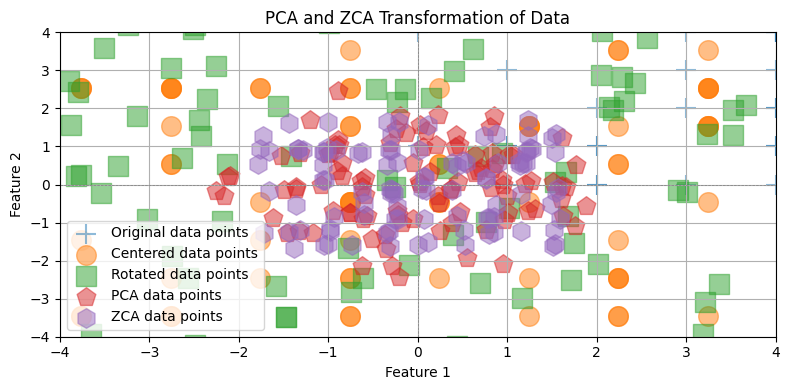

In [15]:
X = randint(10, size=(100, 4))
Xc = X - np.mean(X, axis=0) # center the data
Xcov = np.cov(Xc, rowvar=False, bias=True) # covariance matrix
val, vec = np.linalg.eig(Xcov) # eigen decomposition
diag_val = np.diag(1 / np.sqrt(val)) # diagonal matrix for scaling

Xrot = (vec @ Xc.T).T # apply rotation
Xpca = (diag_val @ vec.T @ Xc.T).T # apply PCA
Xzca = (vec @ diag_val @ vec.T @ Xc.T).T # apply ZCA

print("Shapes of transformed datasets:")
print("Centered data shape:", Xc.shape)
print("Rotated data shape:", Xrot.shape)
print("PCA data shape:", Xpca.shape)
print("ZCA data shape:", Xzca.shape)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], marker="+", s=200, alpha=0.5, label="Original data points")
plt.scatter(Xc[:, 0], Xc[:, 1], marker="o", s=200, alpha=0.5, label="Centered data points")
plt.scatter(Xrot[:, 0], Xrot[:, 1], marker="s", s=200, alpha=0.5, label="Rotated data points")
plt.scatter(Xpca[:, 0], Xpca[:, 1], marker="p", s=200, alpha=0.5, label="PCA data points")
plt.scatter(Xzca[:, 0], Xzca[:, 1], marker="h", s=200, alpha=0.5, label="ZCA data points")

plt.title("PCA and ZCA Transformation of Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3f8d3730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3f8d3c70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fdb3f8d34c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3f900220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3f9004c0>,
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb3f902710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb3f902da0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fdb3f902530>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb3f9032e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb3f903580>,
 'means': []}

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Number of Buses')

Text(0.5, 1.0, 'Boxplots of Original and Quantile Transformed Data')

([<matplotlib.axis.XTick at 0x7fdb3fa2aaa0>,
 [Text(1.5, 0, 'Original Data'), Text(4.5, 0, 'Quantile Transformed Data')])

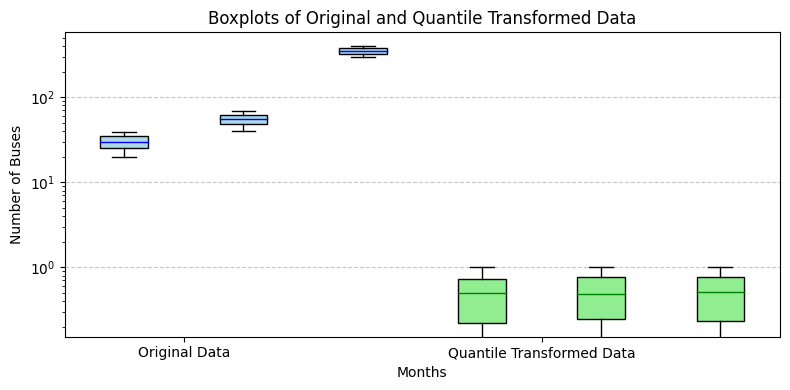

In [16]:
X = np.array([
    randint(20, 40, size=(100,)),     # Data for Month 1
    randint(40, 70, size=(100,)),     # Data for Month 2
    randint(300, 400, size=(100,))    # Data for Month 3
    ]).T

QT = QuantileTransformer(n_quantiles=10, random_state=0).fit_transform(X)

plt.figure(figsize=(8, 4))
plt.boxplot(X, positions=[1, 2, 3], widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'))
plt.boxplot(QT, positions=[4, 5, 6], widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='green'))
plt.xlabel("Months")
plt.ylabel("Number of Buses")
plt.title("Boxplots of Original and Quantile Transformed Data")
plt.yscale('log')
plt.xticks([1.5, 4.5], ['Original Data', 'Quantile Transformed Data'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 600x300 with 0 Axes>

(array([0.58633023, 0.39088682, 0.        , 0.58633023, 0.        ,
        0.09772171, 0.87949535, 0.        , 0.58633023, 0.        ,
        0.39088682, 0.58633023, 0.        , 0.58633023, 0.        ,
        0.29316512, 0.39088682, 0.        , 0.09772171, 0.39088682,
        0.        , 0.09772171, 0.58633023, 0.        , 0.87949535,
        0.39088682, 0.        , 0.19544341, 0.78177365, 0.97721706]),
 array([-1.6482672 , -1.54593579, -1.44360438, -1.34127297, -1.23894156,
        -1.13661015, -1.03427874, -0.93194733, -0.82961592, -0.72728451,
        -0.6249531 , -0.52262169, -0.42029027, -0.31795886, -0.21562745,
        -0.11329604, -0.01096463,  0.09136678,  0.19369819,  0.2960296 ,
         0.39836101,  0.50069242,  0.60302383,  0.70535524,  0.80768665,
         0.91001807,  1.01234948,  1.11468089,  1.2170123 ,  1.31934371,
         1.42167512]),
 <BarContainer object of 30 artists>)

(array([0.58615808, 0.39077205, 0.        , 0.58615808, 0.        ,
        0.09769301, 0.87923711, 0.        , 0.58615808, 0.        ,
        0.39077205, 0.58615808, 0.        , 0.58615808, 0.        ,
        0.29307904, 0.39077205, 0.        , 0.09769301, 0.39077205,
        0.        , 0.09769301, 0.58615808, 0.        , 0.87923711,
        0.39077205, 0.        , 0.19538603, 0.7815441 , 0.97693013]),
 array([-1.65030922, -1.54794775, -1.44558629, -1.34322482, -1.24086336,
        -1.13850189, -1.03614042, -0.93377896, -0.83141749, -0.72905603,
        -0.62669456, -0.52433309, -0.42197163, -0.31961016, -0.2172487 ,
        -0.11488723, -0.01252576,  0.0898357 ,  0.19219717,  0.29455863,
         0.3969201 ,  0.49928157,  0.60164303,  0.7040045 ,  0.80636596,
         0.90872743,  1.0110889 ,  1.11345036,  1.21581183,  1.31817329,
         1.42053476]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Transformed Values')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Histogram of Yeo-Johnson and Box-Cox Transformed Data')

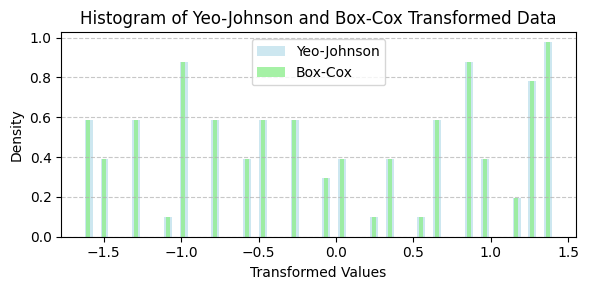

In [17]:
X = np.array([
    randint(20, 40, size=(100,)),  # Data for feature 1
    randint(40, 70, size=(100,)),  # Data for feature 2
    randint(300, 400, size=(100,))  # Data for feature 3
    ]).T

PT_yj = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(X)
PT_bc = PowerTransformer(method='box-cox', standardize=True).fit_transform(X)

plt.figure(figsize=(6, 3))
plt.hist(PT_yj[:, 0], bins=30, rwidth=0.5, density=True, alpha=0.6, label='Yeo-Johnson', color='lightblue')
plt.hist(PT_bc[:, 0], bins=30, rwidth=0.25, density=True, alpha=0.8, label='Box-Cox', color='lightgreen')

plt.xlabel("Transformed Values")
plt.ylabel("Density")
plt.title("Histogram of Yeo-Johnson and Box-Cox Transformed Data")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Data')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

Text(0.5, 1.0, 'Normalized Data (L1 Norm)')

Text(0.5, 0, 'Normalized Feature 1')

Text(0, 0.5, 'Normalized Feature 2')

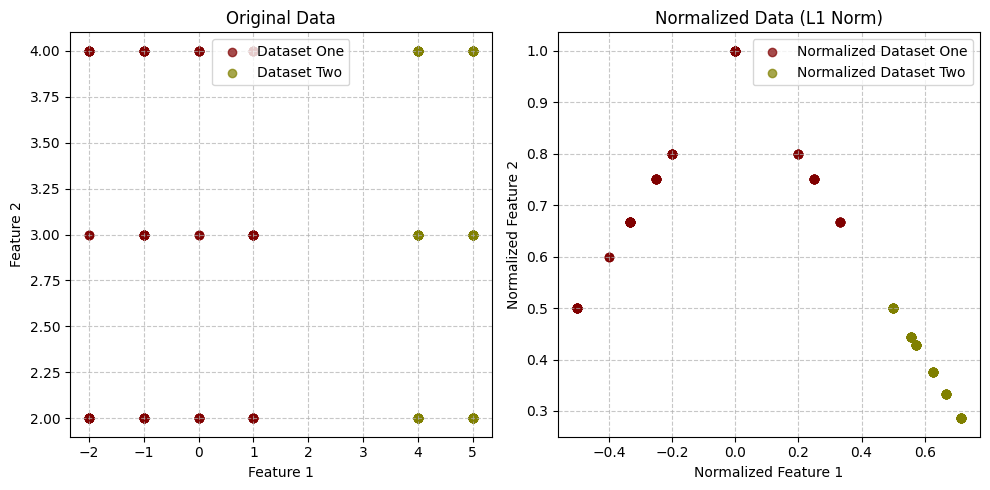

In [18]:
X1 = np.array([
    randint(-2, 2, size=(100,)),  # Feature 1 for dataset one
    randint(2, 5, size=(100,))    # Feature 2 for dataset one
    ]).T

X2 = np.array([
    randint(4, 6, size=(100,)),   # Feature 1 for dataset two
    randint(2, 5, size=(100,))    # Feature 2 for dataset two
    ]).T

Xn1 = Normalizer(norm="l1").fit_transform(X1)
Xn2 = Normalizer(norm="l1").fit_transform(X2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(X1[:, 0], X1[:, 1], c='maroon', label='Dataset One', alpha=0.7)
ax[0].scatter(X2[:, 0], X2[:, 1], c='olive', label='Dataset Two', alpha=0.7)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.7)

ax[1].scatter(Xn1[:, 0], Xn1[:, 1], c='maroon', label='Normalized Dataset One', alpha=0.7)
ax[1].scatter(Xn2[:, 0], Xn2[:, 1], c='olive', label='Normalized Dataset Two', alpha=0.7)
ax[1].set_title('Normalized Data (L1 Norm)')
ax[1].set_xlabel('Normalized Feature 1')
ax[1].set_ylabel('Normalized Feature 2')
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
games = [
    ['first', 'gold', 'top', 3000.00],
    ['second', 'silver', 'middle', 2000.00],
    ['third', 'bronze', 'bottom', 1000.00]
    ]

categorical_features = [[game[0], game[1], game[2]] for game in games]

winners = ['first', 'second', 'third']
medals = ['gold', 'silver', 'bronze']
ranks = ['top', 'middle', 'bottom']

ordinal_encoder = OrdinalEncoder(categories=[winners, medals, ranks])
encoded_features = ordinal_encoder.fit_transform(categorical_features)

encoded_games = [
    [int(encoded_features[i][0]), int(encoded_features[i][1]), int(encoded_features[i][2]), games[i][3]]
    for i in range(len(games))
    ]

print("Encoded Games:")
for game in encoded_games:
    print(game)

Encoded Games:
[0, 0, 0, 3000.0]
[1, 1, 1, 2000.0]
[2, 2, 2, 1000.0]


In [20]:
X = [
    ['football', 'helmet', 'ground', 3000.0],
    ['basketball', 'shoes', 'net', 2000.0],
    ['cricket', 'bat', 'pitch', 1000.0],
    ['tennis', 'band', 'court', 5000.0]
    ]

categorical_columns = [0, 1, 2]
numeric_columns = [3]

categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),  # one-hot encoding to categorical columns
        ('num', numeric_transformer, numeric_columns)           # retain numeric column as is
    ]
    )

X_encoded = preprocessor.fit_transform(X)

print("Encoded Data:")
print(X_encoded)

Encoded Data:
[[0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 3000.0]
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1000.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 5000.0]]


In [21]:
data = [
    ['first', 'gold', 'top', 3000.0, 'football', 'helmet', 'ground', 300.0],
    ['second', 'silver', 'middle', 2000.0, 'basketball', 'shoes', 'net', 200.0],
    ['third', 'bronze', 'bottom', 1000.0, 'tennis', 'band', 'court', 500.0]
    ]

categorical_columns_ordinal = [0, 1, 2]
categorical_columns_onehot = [4, 5, 6]
numeric_columns = [3, 7]

winners = ['first', 'second', 'third']
medals = ['gold', 'silver', 'bronze']
ranks = ['top', 'middle', 'bottom']

ordinal_encoder = OrdinalEncoder(categories=[winners, medals, ranks])
onehot_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, categorical_columns_ordinal),  # ordinal encoding for winners, medals, ranks
        ('numeric', 'passthrough', numeric_columns),                # pass through numeric columns unchanged
        ('onehot', onehot_transformer, categorical_columns_onehot)  # one-hot encoding for sports equipment
    ]
    )

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_encoded = pipeline.fit_transform(data)

print("Encoded Data:")
print(X_encoded)

Encoded Data:
[[0.0 0.0 0.0 3000.0 300.0 1.0 0.0 1.0 0.0 1.0 0.0]
 [1.0 1.0 1.0 2000.0 200.0 0.0 0.0 0.0 1.0 0.0 1.0]
 [2.0 2.0 2.0 1000.0 500.0 0.0 1.0 0.0 0.0 0.0 0.0]]


In [22]:
data = np.array([[2.5, 2], [-5.1, 5], [9.9, 7], [-12.3, 21], [2.7, 15]])
n_bins = 4
encoder = KBinsDiscretizer(n_bins = n_bins, encode = 'ordinal', strategy = 'uniform')
data_binned = encoder.fit_transform(data)
print("Binned Data:")
print(data_binned)
print("Edges:")
print(encoder.bin_edges_)

Binned Data:
[[2. 0.]
 [1. 0.]
 [3. 1.]
 [0. 3.]
 [2. 2.]]
Edges:
[array([-12.3 ,  -6.75,  -1.2 ,   4.35,   9.9 ])
 array([ 2.  ,  6.75, 11.5 , 16.25, 21.  ])]


In [23]:
data = np.array([[2.5, 2], [-5.1, 5], [9.9, 7], [-12.3, 21], [2.7, 15]])

n_bins = 4

encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
data_binned = encoder.fit_transform(data)

print("Binned Data:")
print(data_binned)
print("Edges:")
print(encoder.bin_edges_)

Binned Data:
[[2. 0.]
 [1. 0.]
 [3. 1.]
 [0. 3.]
 [2. 2.]]
Edges:
[array([-12.3 ,  -6.75,  -1.2 ,   4.35,   9.9 ])
 array([ 2.  ,  6.75, 11.5 , 16.25, 21.  ])]


In [24]:
X = [[1., -1., 2.], [2., 0., 0.], [0., 1., -1.]]

threshold = 1.5
binarizer = Binarizer(threshold=threshold)

Xbin = binarizer.fit_transform(X)

print("Binned Data:")
print(Xbin)

Binned Data:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [25]:
X = np.arange(6).reshape(3, 2)

poly = PolynomialFeatures(degree=2)
Xp = poly.fit_transform(X)

print("Original Data:\n", X)
print("\nTransformed Polynomial Features:\n", Xp)

Original Data:
 [[0 1]
 [2 3]
 [4 5]]

Transformed Polynomial Features:
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [26]:
X = np.array([[1, 2],
              [np.nan, 2],
              [5, np.nan]])

imp = SimpleImputer(missing_values=np.nan, strategy='mean', copy=False, add_indicator=True)

X_imputed = imp.fit_transform(X)

print("Original Data:\n", X)
print("\nImputed Data:\n", X_imputed)

Original Data:
 [[1. 2.]
 [3. 2.]
 [5. 2.]]

Imputed Data:
 [[1. 2. 0. 0.]
 [3. 2. 1. 0.]
 [5. 2. 0. 1.]]


In [27]:
def impute_missing_values(X):
    """
    Impute missing values in the dataset using various regression methods.

    Parameters:
    X : np.ndarray
        Input data with missing values.

    Returns:
    dict
        A dictionary containing imputed datasets using different estimators.
    """

    imputer_methods = {
        'Bayesian Ridge': IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan),
        'Decision Tree Regressor': IterativeImputer(estimator=DecisionTreeRegressor(max_features="sqrt"), missing_values=np.nan),
        'Extra Trees Regressor': IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10), missing_values=np.nan),
        'K Neighbors Regressor': IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=2), missing_values=np.nan)
        }

    imputed_results = {}

    for name, imputer in imputer_methods.items():
        imputed_results[name] = imputer.fit_transform(X)

    return imputed_results

X = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [np.nan, 8],
              [9, np.nan]])

imputed_data = impute_missing_values(X)

for method, result in imputed_data.items():
    print(f"{method}: \n{result.round(4)}\n")

Bayesian Ridge: 
[[1.    2.   ]
 [3.    4.   ]
 [5.    6.   ]
 [7.008 8.   ]
 [9.    9.992]]

Decision Tree Regressor: 
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [9. 8.]
 [9. 8.]]

Extra Trees Regressor: 
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [9. 8.]
 [9. 8.]]

K Neighbors Regressor: 
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]
 [9. 7.]]

